This is my first time using Jupyter Lab *and* Python 3, so we'll see how this goes.

In [34]:
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy import units as u
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import patches
%matplotlib inline

### Read in the data

In [2]:
# This is the file that Song said to start with.
data_file_1 = '/Users/greg/Desktop/git_projects/catalog_plots/data/s16a_massive_logmMax_11.45_z_0.25_0.47_mhalo.fits'
hdu1 = fits.open(data_file_1)

So here I'm going to list the useful bits of this data set:

`ra`: Right Ascension

`dec`: Declination
(*These will be useful when I make the galaxy map plot*)

`z_best`: Best redshift value

`logmh_host`: Virial mass


In [3]:
data_table = Table(hdu1[1].data) # For visualization, just in case.
# Make z cut 0.25<z<.45 , logm100 > 11.5

Now what I want to do is take the galaxy halo masses and assign them a radius. To do this, I will use  `Colossus` (Diemer 2017).

In [4]:
import colossus
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15')
from colossus.halo import mass_so

In [5]:
data_table.colnames # find the useful columns

['object_id',
 'ra',
 'dec',
 'z_spec',
 'z_best',
 'z_phot',
 'z_type',
 'gcmodel_mag',
 'gcmodel_mag_err',
 'rcmodel_mag',
 'rcmodel_mag_err',
 'icmodel_mag',
 'icmodel_mag_err',
 'zcmodel_mag',
 'zcmodel_mag_err',
 'ycmodel_mag',
 'ycmodel_mag_err',
 'MSTAR',
 'logm_10',
 'logm_30',
 'logm_100',
 'logm_max',
 'vdisp_sdss',
 'vdisp_err_sdss',
 'logms_gama',
 'logms_err_gama',
 'id_cluster_redm',
 'p_mem_redm',
 'z_lambda_redm',
 'lambda_redm',
 'p_cen_1_redm',
 'id_camira',
 'z_camira',
 'n_cor_camira',
 'logms_camira',
 'r50_max',
 'r50_100',
 'logmh_peak',
 'logmh_vir',
 'logmh_host']

In [6]:
# Put the (useful) data into nice arrays
logm_100 = np.array(data_table['logm_100'])
z = np.array(data_table['z_best'])
z_best = []
logmh_host = []
ra = []
dec = []
for i in range(len(logm_100)):
    if logm_100[i] > 11.5 and z[i] > .25 and z[i] < .45:
        z_best.append(data_table['z_best'][i])
        logmh_host.append(data_table['logmh_host'][i])
        ra.append(data_table['ra'][i])
        dec.append(data_table['dec'][i])
z_best = np.array(z_best)
logmh_host = np.array(logmh_host)
ra = np.array(ra)
dec = np.array(dec)
print(np.shape(logm_100))
print(np.shape(ra))

(6458,)
(3534,)


I want to split the data into four different fields. From Song:
* G09H  RA: 130-137 (133.5)  DEC: -0.25 - 2.30 (0.96)
* G12H  RA: 178-181 (179.5)  DEC: -1.38 - 1.21 (-0.09)
* G15H  RA: 214-219 (216.5)  DEC: -1.38-  1.21 (-0.09)
* HectoMap  RA: 244.0 - 247.0 (245.5)  DEC: 42.3 - 44.3 (42.8)

In [37]:
# G09H
g09h_ra = []
g09h_dec = []
g09h_logmh_host = []
g09h_z_best = []
for i in range(len(ra)):
    if ra[i] >= 130.0 and ra[i] <= 137.0 and dec[i] >= -0.25 and dec[i] <=2.30:
            g09h_ra.append(ra[i])
            g09h_dec.append(dec[i])
            g09h_logmh_host.append(logmh_host[i])
            g09h_z_best.append(z_best[i])

# Turn the lists into arrays
g09h_ra = np.array(g09h_ra)
g09h_dec = np.array(g09h_dec)
g09h_logmh_host = np.array(g09h_logmh_host)
g09h_z_best = np.array(g09h_z_best)
# Now to find r_halo
g09h_r_halo = mass_so.M_to_R(10**g09h_logmh_host , g09h_z_best, 'vir') # kpc/h

# Turn the physical radius into an angular size in degrees
theta_per_kpc = FlatLambdaCDM(H0=70 , Om0= 0.3).arcsec_per_kpc_proper(g09h_z_best)
g09h_r_halo_deg = ((g09h_r_halo*u.kpc * theta_per_kpc).to(u.deg))/u.deg

# circles
g09h_halo_circle = []
for i in range(len(g09h_r_halo_deg)):
    g09h_halo_circle.append(Circle((g09h_ra[i],g09h_dec[i]),g09h_r_halo_deg[i],fill=False))

In [55]:
# G12H
g12h_ra = []
g12h_dec = []
g12h_logmh_host = []
g12h_z_best = []
for i in range(len(ra)):
    if ra[i] >= 178.0 and ra[i] <= 181.0 and dec[i] >= -1.38 and dec[i] <=1.21:
            g12h_ra.append(ra[i])
            g12h_dec.append(dec[i])
            g12h_logmh_host.append(logmh_host[i])
            g12h_z_best.append(z_best[i])

# Turn the lists into arrays
g12h_ra = np.array(g12h_ra)
g12h_dec = np.array(g12h_dec)
g12h_logmh_host = np.array(g12h_logmh_host)
g12h_z_best = np.array(g12h_z_best)
# Now to find r_halo
g12h_r_halo = mass_so.M_to_R(10**g12h_logmh_host , g12h_z_best, 'vir') # kpc/h

# Turn the physical radius into an angular size in degrees
theta_per_kpc = FlatLambdaCDM(H0=70 , Om0= 0.3).arcsec_per_kpc_proper(g12h_z_best)
g12h_r_halo_deg = ((g12h_r_halo*u.kpc * theta_per_kpc).to(u.deg))/u.deg

# circles
g12h_halo_circle = []
for i in range(len(g12h_r_halo_deg)):
    g12h_halo_circle.append(Circle((g12h_ra,g12h_dec),g12h_r_halo_deg,fill=False))
g12h_circles = plt.Circle(g12h_halo_circle)

In [39]:
# G15H
g15h_ra = []
g15h_dec = []
g15h_logmh_host = []
g15h_z_best = []
for i in range(len(ra)):
    if ra[i] >= 214.0 and ra[i] <= 219.0 and dec[i] >= -1.38 and dec[i] <= 1.21:
            g15h_ra.append(ra[i])
            g15h_dec.append(dec[i])
            g15h_logmh_host.append(logmh_host[i])
            g15h_z_best.append(z_best[i])

# Turn the lists into arrays
g15h_ra = np.array(g15h_ra)
g15h_dec = np.array(g15h_dec)
g15h_logmh_host = np.array(g15h_logmh_host)
g15h_z_best = np.array(g15h_z_best)
# Now to find r_halo
g15h_r_halo = mass_so.M_to_R(10**g15h_logmh_host , g15h_z_best, 'vir') # kpc/h

# Turn the physical radius into an angular size in degrees
theta_per_kpc = FlatLambdaCDM(H0=70 , Om0= 0.3).arcsec_per_kpc_proper(g15h_z_best)
g15h_r_halo_deg = ((g15h_r_halo*u.kpc * theta_per_kpc).to(u.deg))/u.deg

# circles
g15h_halo_circle = []
for i in range(len(g15h_r_halo_deg)):
    g15h_halo_circle.append(Circle((g15h_ra,g15h_dec),g15h_r_halo_deg,fill=False))
g15h_circles = plt.Circle(g15h_halo_circle)

In [56]:
# HectoMap
hm_ra = []
hm_dec = []
hm_logmh_host = []
hm_z_best = []
for i in range(len(ra)):
    if ra[i] >= 130.0 and ra[i] <= 137.0 and dec[i] >= -0.25 and dec[i] <=2.30:
            hm_ra.append(ra[i])
            hm_dec.append(dec[i])
            hm_logmh_host.append(logmh_host[i])
            hm_z_best.append(z_best[i])

# Turn the lists into arrays
hm_ra = np.array(hm_ra)
hm_dec = np.array(hm_dec)
hm_logmh_host = np.array(hm_logmh_host)
hm_z_best = np.array(hm_z_best)
# Now to find r_halo
hm_r_halo = mass_so.M_to_R(10**hm_logmh_host , hm_z_best, 'vir') # kpc/h

# Turn the physical radius into an angular size in degrees
theta_per_kpc = FlatLambdaCDM(H0=70 , Om0= 0.3).arcsec_per_kpc_proper(hm_z_best)
hm_r_halo_deg = ((hm_r_halo*u.kpc * theta_per_kpc).to(u.deg))/u.deg

# circles
hm_halo_circle = []
for i in range(len(hm_r_halo_deg)):
    hm_halo_circle.append(Circle((hm_ra,g09h_dec),hm_r_halo_deg,fill=False))
hm_circles = plt.Circle(hm_halo_circle)

(412,) (412,) (412,)


Text(0,0.5,'Dec')

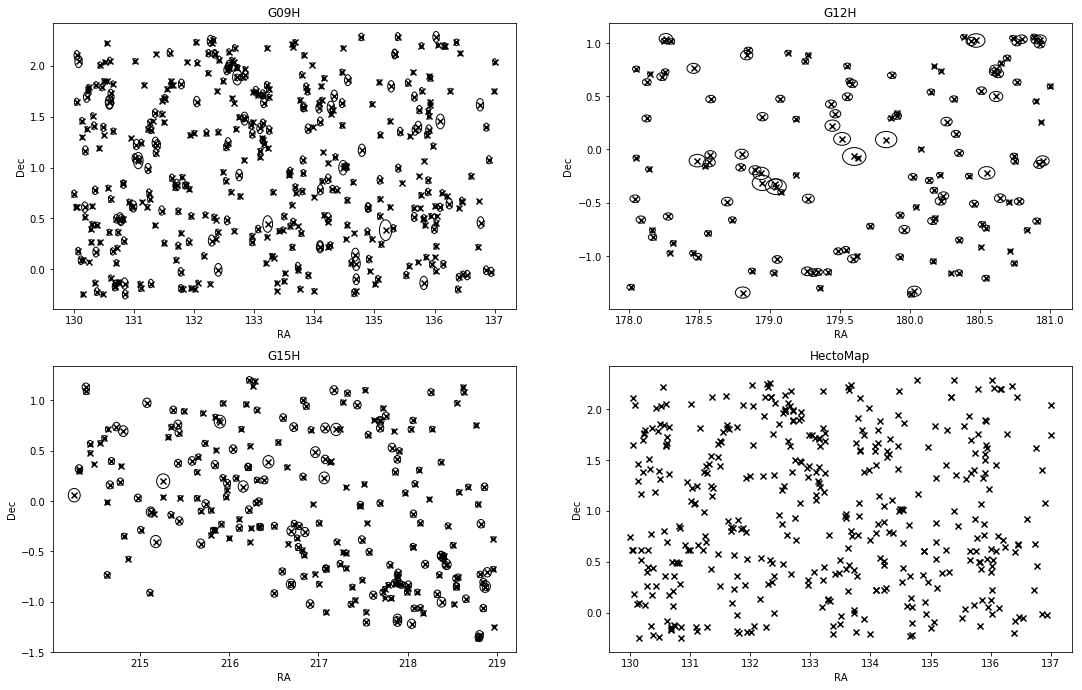

In [59]:
fig = plt.figure(figsize = [15, 10])
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.20, hspace=0.20)
print(np.shape(g09h_ra), np.shape(g09h_dec) , np.shape(g09h_r_halo_deg))
ax1 = fig.add_subplot(221)
ax1.scatter(g09h_ra , g09h_dec, marker = 'x' , color = 'k')
for i in range(len(g09h_r_halo_deg)):
    ax1.add_patch(patches.Circle((g09h_ra[i],g09h_dec[i]),g09h_r_halo_deg[i],fill=False))
ax1.title.set_text('G09H')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax2 = fig.add_subplot(222)
ax2.scatter(g12h_ra , g12h_dec, marker = 'x' , color = 'k')
for i in range(len(g12h_r_halo_deg)):
    ax2.add_patch(patches.Circle((g12h_ra[i],g12h_dec[i]),g12h_r_halo_deg[i],fill=False))
ax2.title.set_text('G12H')
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')
ax3 = fig.add_subplot(223)
ax3.scatter(g15h_ra , g15h_dec, marker = 'x' , color = 'k')
for i in range(len(g15h_r_halo_deg)):
    ax3.add_patch(patches.Circle((g15h_ra[i],g15h_dec[i]),g15h_r_halo_deg[i],fill=False))
ax3.title.set_text('G15H')
ax3.set_xlabel('RA')
ax3.set_ylabel('Dec')
ax4 = fig.add_subplot(224)
ax4.scatter(hm_ra , hm_dec , marker = 'x' , color = 'k')
for i in range(len(gh_r_halo_deg)):
    ax1.add_patch(patches.Circle((g09h_ra[i],g09h_dec[i]),g09h_r_halo_deg[i],fill=False))
ax4.title.set_text('HectoMap')
ax4.set_xlabel('RA')
ax4.set_ylabel('Dec')